# Objective

To revise the notion of tensors and feature scaling

## Preliminaries


In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Tensors

## 0-dimensional and 1-dimensional tensors

 - 0-dimensional tensors are *scalars*. For e.g., 1, 3, 456
 - 1-dimensional tensors are *vectors*. For e.g., `[1, 2, 3, 4, 5]`. We can move along this tensor in one dimenion only

This world of 0 and 1 dimensional tensors is rather uninteresting since there are no 'features'. They can only be described.

## 2-dimensional tensors

 - 2-dimensional tensors are *matrices* (data frames). All tabular data are matrices where moving across the row describes a single unit and moving down a column describes a specific feature of the sample

In [9]:
diabetes_df = pd.read_csv("/content/drive/MyDrive/AI-ML/supervised-learning-revision/Day1/data/diabetes.csv")

In [13]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
diabetes_df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
548,1,164,82,43,67,32.8,0.341,50,0
528,0,117,66,31,188,30.8,0.493,22,0
93,4,134,72,0,0,23.8,0.277,60,1
146,9,57,80,37,0,32.8,0.096,41,0
721,1,114,66,36,200,38.1,0.289,21,0
217,6,125,68,30,120,30.0,0.464,32,0
570,3,78,70,0,0,32.5,0.270,39,0
573,2,98,60,17,120,34.7,0.198,22,0
97,1,71,48,18,76,20.4,0.323,22,0
84,5,137,108,0,0,48.8,0.227,37,1


In [14]:
diabetes_X, diabetes_y = diabetes_df.drop('Outcome', axis=1), diabetes_df.Outcome

In [15]:
diabetes_Xtrain, diabetes_Xtest, diabetes_ytrain, diabetes_ytest = train_test_split(diabetes_X, diabetes_y,
                                                                                    test_size=0.2,
                                                                                    random_state=20130810)

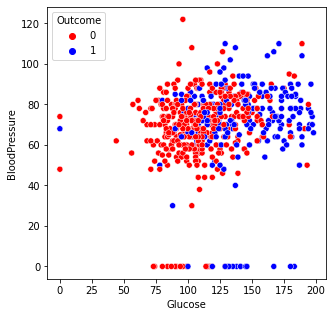

In [16]:
plt.figure(figsize=(5, 5))

sns.scatterplot(x=diabetes_Xtrain.Glucose, y=diabetes_Xtrain.BloodPressure,
                hue=diabetes_ytrain,
                palette={0: "r", 1: "b"})

[Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [17]:
sc = StandardScaler()

In [18]:
diabetes_scaled_Xtrain = sc.fit_transform(diabetes_Xtrain)
diabetes_scaled_Xtest = sc.transform(diabetes_Xtest)

In [20]:
sc.mean_

array([  3.8485342 , 121.15472313,  69.08794788,  20.26221498,
        79.36482085,  31.97247557,   0.46684039,  33.1970684 ])

In [21]:
sc.scale_

array([  3.35832712,  31.78542424,  19.76001172,  16.07204785,
       111.96927132,   8.05901935,   0.32688787,  11.58182578])

In [23]:
diabetes_scaledXtrain_df = pd.DataFrame(diabetes_scaled_Xtrain, 
                                        columns=diabetes_Xtrain.columns)

In [24]:
diabetes_scaledXtrain_df.Glucose.describe()

count    6.140000e+02
mean    -2.064942e-16
std      1.000815e+00
min     -3.811644e+00
25%     -6.970089e-01
50%     -1.307116e-01
75%      6.164862e-01
max      2.417626e+00
Name: Glucose, dtype: float64

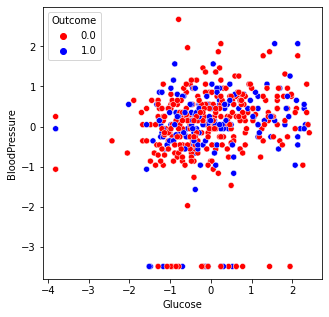

In [25]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=diabetes_scaledXtrain_df.Glucose, 
                y=diabetes_scaledXtrain_df.BloodPressure,
                hue=diabetes_ytrain.astype(int),
                palette={0: "r", 1: "b"})

Scaling can help interepreting model results too.

## 3-dimensional and 4-dimensional tensors

Unstructured data is stored in multidimensional arrays called `tensors`.



 - 3-dimensional tensors (no fancy names for these) are used to describe sentences and paragraphs of [text](/content/drive/MyDrive/AI-ML/supervised-learning-revision/Day1/data/representing-text.xlsx) 
 - 4-dimensional tensors are used to describe [images](/content/drive/MyDrive/AI-ML/supervised-learning-revision/Day1/data/representing-images.xlsx) 


# Summary

- Choosing appropriate input representation methods is important for data quality

- Feature transformations should never leak from the training set to the test set